# Lesson 09 Assignment
Author:Ajai Shukla
Instructions

It is recommended you complete the lab exercises for this lesson before beginning the assignment.

Using the CIFAR-10 dataset (Links to an external site.), create a new notebook to build a TensorlLow model. Perform each of the following tasks and answer the related questions:

    Read CIFAR-10 dataset from Keras. (Links to an external site.)
    Explore data
    Preprocess and prepare data for classification
    Build a TensorFlow model using a single dense hidden layer
    Apply model to test set and evaluate accuracy
    Perform 3 adjusts to the number of layers and activation functions to improve accuracy
    Summarize your findings regarding the different iterations and any insights gained

In [21]:
from keras.datasets import cifar10
import time
import keras
import keras.utils
from keras import utils as np_utils
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers import Activation
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras_sequential_ascii import sequential_model_to_ascii_printout
from tensorflow.keras import backend as K
from matplotlib import pyplot
from tensorflow import keras
# Import Tensorflow with multiprocessing
import tensorflow as tf
import multiprocessing as mp
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.optimizers import SGD
from keras.constraints import maxnorm
from keras.utils import np_utils
from keras.layers.noise import GaussianNoise
from keras.layers.advanced_activations import *
from keras.utils import plot_model
import pandas as pd
import matplotlib.pyplot as plt
import time, pickle
%matplotlib inline


# The CIFAR-10 image classes are encoded as integers 0-9 by the following Python dictionary

In [22]:
nb_classes = 10
class_name = {
    0: 'airplane',
    1: 'automobile',
    2: 'bird',
    3: 'cat',
    4: 'deer',
    5: 'dog',
    6: 'frog',
    7: 'horse',
    8: 'ship',
    9: 'truck',
}

# Load training and test data

In [23]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
y_train = y_train.reshape(y_train.shape[0])  # somehow y_train comes as a 2D nx1 matrix
y_test = y_test.reshape(y_test.shape[0])

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'training samples')
print(X_test.shape[0], 'validation samples')


X_train shape: (50000, 32, 32, 3)
50000 training samples
10000 validation samples


The original data of each image is a 32x32x3 matrix of integers from 0 to 255. We need to scale it down to floats in the unit interval

In [24]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [25]:
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

Let's also write two small utilities for drawing samples of images, so we can inspect our results visually.


In [26]:
def draw_img(i):
    im = X_train[i]
    c = y_train[i]
    plt.imshow(im)
    plt.title("Class %d (%s)" % (c, class_name[c]))
    plt.axis('on')

def draw_sample(X, y, n, rows=4, cols=4, imfile=None, fontsize=12):
    for i in range(0, rows*cols):
        plt.subplot(rows, cols, i+1)
        im = X[n+i].reshape(32,32,3)
        plt.imshow(im, cmap='gnuplot2')
        plt.title("{}".format(class_name[y[n+i]]), fontsize=fontsize)
        plt.axis('off')
        plt.subplots_adjust(wspace=0.6, hspace=0.01)
        #plt.subplots_adjust(hspace=0.45, wspace=0.45)
        #plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
    if imfile:
        plt.savefig(imfile)

Let's draw image 7 in X_train for example

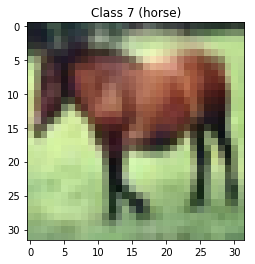

In [27]:
draw_img(7)

To test the second utility, let's draw the first 15 images in a 3x5 grid:

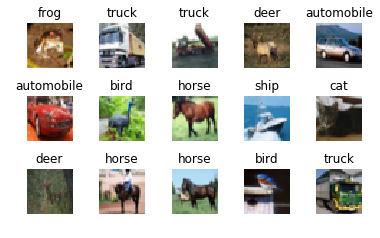

In [28]:
draw_sample(X_train, y_train, 0, 3, 5)

In [29]:
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

Building Neural Networks for CIFAR-10

# Lets Train Model 1

In [30]:
nb_epoch = 50
batch_size = 32
import tensorflow as tf
model1 = keras.Sequential()

In [31]:
model1.add(keras.layers.Conv2D(32, (3, 3), input_shape=(32, 32,3), padding='same', activation='relu'))
model1.add(keras.layers.Dropout(0.25))
model1.add(keras.layers.Conv2D(32, 3, 3, activation='relu'))

In [32]:
model1.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

model1.add(keras.layers.Flatten())
model1.add(keras.layers.Dense(512, activation='relu'))
model1.add(keras.layers.Dropout(0.5))
model1.add(keras.layers.Dense(nb_classes, activation='softmax'))
# Compile model
lrate = 0.01
decay = lrate/nb_epoch
sgd = keras.optimizers.SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)

In [33]:
model1.compile(optimizer=sgd, loss='sparse_categorical_crossentropy',  metrics=['accuracy'])

In [34]:
h = model1.fit(X_train, y_train, nb_epoch=nb_epoch, batch_size=batch_size, validation_data=(X_test, y_test))
print(model1.summary())
print('Standard Training.')
print('Saving model1 to the file "model1.h5"')
model1.save("model1.h5")

W0908 10:52:36.169506  5884 training.py:686] The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 38s 757us/sample - loss: 1.7576 - accuracy: 0.3628 - val_loss: 1.4564 - val_accuracy: 0.4843
Epoch 2/50
50000/50000 [==============================] - 42s 845us/sample - loss: 1.4518 - accuracy: 0.4768 - val_loss: 1.3082 - val_accuracy: 0.5294
Epoch 3/50
50000/50000 [==============================] - 44s 874us/sample - loss: 1.3299 - accuracy: 0.5216 - val_loss: 1.2199 - val_accuracy: 0.5659
Epoch 4/50
50000/50000 [==============================] - 42s 842us/sample - loss: 1.2431 - accuracy: 0.5566 - val_loss: 1.1579 - val_accuracy: 0.5864
Epoch 5/50
50000/50000 [==============================] - 42s 845us/sample - loss: 1.1759 - accuracy: 0.5808 - val_loss: 1.1246 - val_accuracy: 0.5991
Epoch 6/50
50000/50000 [==============================] - 44s 881us/sample - loss: 1.1234 - accuracy: 0.5980 - val_loss: 1.0962 - val_accuracy: 0.6133
Epoch 7/50
50000/50000 [====================

# Inspecting the output for Model1
before we search for a new model, let's take a quick look on some of the cases that our model1 missed. 

The predict_classes method is helpful for getting a vector (y_pred) of the predicted classes of model1. We should compare y_pred to the expected true classes y_test in order to get the false cases:

In [35]:
# Final evaluation of the model
scores = model1.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 70.13%


In [55]:
accuracy, loss = model2.evaluate(X_test, y_test, verbose=0)
print("Training: accuracy  = %f  ;  loss = %f" % (accuracy, loss))

Training: accuracy  = 1.880443  ;  loss = 0.709000


In [36]:
y_pred = model1.predict_classes(X_test)

In [37]:
true_preds = [(x,y) for (x,y,p) in zip(X_test, y_test, y_pred) if y == p]
false_preds = [(x,y,p) for (x,y,p) in zip(X_test, y_test, y_pred) if y != p]
print("Number of true predictions: ", len(true_preds))
print("Number of false predictions:", len(false_preds))

Number of true predictions:  7013
Number of false predictions: 2987


The array false_preds consists of all triples (x,y,p) where x is an image, y is its true class, and p is the false predicted value of model1.

Lets visualize a sample of 15 items:


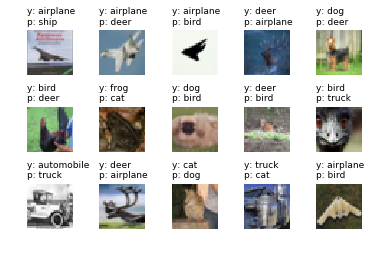

In [38]:
for i,(x,y,p) in enumerate(false_preds[0:15]):
    plt.subplot(3, 5, i+1)
    plt.imshow(x, cmap='gnuplot2')
    plt.title("y: %s\np: %s" % (class_name[y], class_name[p]), fontsize=9, loc='left')
    plt.axis('off')
    plt.subplots_adjust(wspace=0.6, hspace=0.2)

Well, we see that model1 confuses between airplanes and sheep, dogs and cats, etc. But we should not underestimate the fact that it is still correct in 70% of the cases, which is highly untrivial! (suppose that as a programmer you were assigned to write a traditional computer program that can guess the class in 70% of the case 

# Second Keras Model for the CIFAR-10 dataset

Lets first take a look at a few samples of images that are genereated but ImageDataGenerator:

In [39]:
imdgen = ImageDataGenerator(
    featurewise_center = False,  # set input mean to 0 over the dataset
    samplewise_center = False,  # set each sample mean to 0
    featurewise_std_normalization = False,  # divide inputs by std of the dataset
    samplewise_std_normalization = False,  # divide each input by its std
    zca_whitening = False,  # apply ZCA whitening
    rotation_range = 0,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range = 0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range = 0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip = True,  # randomly flip images
    vertical_flip = False,  # randomly flip images
)

Number of images returned by iterator: 15


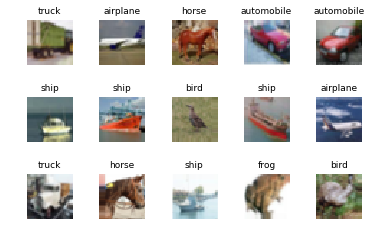

In [40]:
imdgen.fit(X_train)
it = imdgen.flow(X_train, Y_train, batch_size=15) # This is a Python iterator
images, categories = it.next()
print("Number of images returned by iterator:", len(images))
for i in range(15):
    plt.subplot(3, 5, i+1)
    im = images[i]
    c = np.where(categories[i] == 1)[0][0] # convert one-hot to regular index
    plt.imshow(im, cmap='gnuplot2')
    plt.title(class_name[c], fontsize=9)
    plt.axis('off')
    plt.subplots_adjust(wspace=0.6, hspace=0.2)

The images you see are not from the CIFAR-10 collection. They were generated by Keras ImageDataGenerator from images in the CIFAR-10 database by applying various image operators on them.
Lets see now the second type of Keras training based on the ImageDataGenerator. Note the new training method name: fit_generator.

# Model 2 (with Data Augmentation)

In [41]:
nb_epoch = 100   # This tim lets increase the number of epochs to 100
batch_size = 32

model2 = keras.Sequential()
model2.add(keras.layers.Conv2D(32,(3,3), input_shape=(32, 32, 3), activation='relu'))
model2.add(keras.layers.Dropout(0.2))
model2.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
model2.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model2.add(keras.layers.Flatten())
model2.add(keras.layers.Dense(512, activation='relu'))
model2.add(keras.layers.Dropout(0.5))
model2.add(keras.layers.Dense(nb_classes, activation='softmax'))

In [42]:
# Compile model with SGD
lrate = 0.01
decay = lrate/nb_epoch
sgd = keras.optimizers.SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model2.compile(loss='sparse_categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [43]:
print(model2.summary())
print('Augmented Data Training.')
imdgen = ImageDataGenerator(
    featurewise_center = False,  # set input mean to 0 over the dataset
    samplewise_center = False,  # set each sample mean to 0
    featurewise_std_normalization = False,  # divide inputs by std of the dataset
    samplewise_std_normalization = False,  # divide each input by its std
    zca_whitening = False,  # apply ZCA whitening
    rotation_range = 0,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range = 0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range = 0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip = True,  # randomly flip images
    vertical_flip = False,  # randomly flip images
)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
dropout_4 (Dropout)          (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               3211776   
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)              

In [44]:
# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)
imdgen.fit(X_train)

In [45]:
# fit the model on the batches generated by datagen.flow()
dgen = imdgen.flow(X_train, Y_train, batch_size=batch_size)
#fmon = FitMonitor(thresh=0.03, minacc=0.98) # this is from our kerutils module (see above)

In [47]:
h = model2.fit(X_train, y_train, nb_epoch=nb_epoch, batch_size=batch_size, validation_data=(X_test, y_test))

W0908 11:56:25.644080  5884 training.py:686] The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 89s 2ms/sample - loss: 1.6944 - accuracy: 0.3856 - val_loss: 1.3728 - val_accuracy: 0.5083
Epoch 2/100
50000/50000 [==============================] - 92s 2ms/sample - loss: 1.3454 - accuracy: 0.5182 - val_loss: 1.2554 - val_accuracy: 0.5594
Epoch 3/100
50000/50000 [==============================] - 92s 2ms/sample - loss: 1.1632 - accuracy: 0.5863 - val_loss: 1.1515 - val_accuracy: 0.5979
Epoch 4/100
50000/50000 [==============================] - 92s 2ms/sample - loss: 1.0268 - accuracy: 0.6331 - val_loss: 1.0179 - val_accuracy: 0.6434
Epoch 5/100
50000/50000 [==============================] - 94s 2ms/sample - loss: 0.9050 - accuracy: 0.6804 - val_loss: 0.9912 - val_accuracy: 0.6600
Epoch 6/100
50000/50000 [==============================] - 95s 2ms/sample - loss: 0.8008 - accuracy: 0.7163 - val_loss: 0.9736 - val_accuracy: 0.6592
Epoch 7/100
50000/50000 [=========================

50000/50000 [==============================] - 131s 3ms/sample - loss: 0.0404 - accuracy: 0.9865 - val_loss: 1.6525 - val_accuracy: 0.7090
Epoch 55/100
50000/50000 [==============================] - 125s 2ms/sample - loss: 0.0399 - accuracy: 0.9873 - val_loss: 1.7069 - val_accuracy: 0.7067
Epoch 56/100
50000/50000 [==============================] - 125s 3ms/sample - loss: 0.0412 - accuracy: 0.9861 - val_loss: 1.6820 - val_accuracy: 0.7095
Epoch 57/100
50000/50000 [==============================] - 123s 2ms/sample - loss: 0.0401 - accuracy: 0.9864 - val_loss: 1.6738 - val_accuracy: 0.7099
Epoch 58/100
50000/50000 [==============================] - 95s 2ms/sample - loss: 0.0383 - accuracy: 0.9875 - val_loss: 1.6880 - val_accuracy: 0.7095
Epoch 59/100
50000/50000 [==============================] - 98s 2ms/sample - loss: 0.0374 - accuracy: 0.9875 - val_loss: 1.6965 - val_accuracy: 0.7120
Epoch 60/100
50000/50000 [==============================] - 95s 2ms/sample - loss: 0.0341 - accuracy: 0

In [54]:
# Final evaluation of the model
#scores = model2.evaluate(X_test, y_test, verbose=0)
accuracy, loss = model2.evaluate(X_test, y_test, verbose=0)
print("Training: accuracy  = %f  ;  loss = %f" % (accuracy, loss))

Training: accuracy  = 1.880443  ;  loss = 0.709000


In [516]:
y_pred = model2.predict_classes(X_test)

In [445]:
true_preds = [(x,y) for (x,y,p) in zip(X_test, y_test, y_pred) if y == p]
false_preds = [(x,y,p) for (x,y,p) in zip(X_test, y_test, y_pred) if y != p]
print("Number of true predictions: ", len(true_preds))
print("Number of false predictions:", len(false_preds))

Number of true predictions:  1041
Number of false predictions: 8959


Indeed, using convolutional layers has yielded better validation (almost 10% more than the previous model). Training accuracy has drastically dropped from 99.95% to less than 88.7%, but this is not an indication for an inferior model. On the contrary, the extreme overfitting that we got in model1 was a clear indication of model inadequacy. The overfitting that we see in model2 is not too bad, and it is better fit for practical practices than model1.

Still, 80% is not good enough (it was super exceptional in the 90's :-) and we should strive for more. Looking at the precision and loss , it doesn't look like we are going to get much improvement in model2 by adding more epochs or tuning other parameters, although we encourage the students to try other optimizers and activation functions (Keras has plenty of them) if a fast GPU is available for this. Otherwise it can take a lot of time. 

we will continue and experiment with our medium and big models that contain more layers and more neurons.

# Model 3 (with Data Augmentation)

In [509]:
nb_epoch = 120
batch_size = 32
from keras.constraints import maxnorm
model3 = keras.Sequential()
model3.add(keras.layers.Conv2D(32,(3, 3), input_shape=(32, 32, 3), activation='relu'))
model3.add(keras.layers.Dropout(0.2))
model3.add(keras.layers.Conv2D(32,(3, 3), activation='relu', padding='same'))
model3.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model3.add(keras.layers.Dropout(0.2))

model3.add(keras.layers.Conv2D(64, 3, 3, padding='same'))
model3.add(keras.layers.Activation('relu'))
model3.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model3.add(keras.layers.Dropout(0.25))

model3.add(keras.layers.Flatten())
model3.add(keras.layers.Dense(512, activation='relu'))
model3.add(keras.layers.Dropout(0.5))
model3.add(keras.layers.Dense(nb_classes, activation='softmax'))

# Compile model with SGD (Stochastic Gradient Descent)
lrate = 0.01
decay = lrate/nb_epoch
sgd = keras.optimizers.SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model3.compile(loss='sparse_categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model3.summary())

print('Augmented Data Training.')

imdgen = ImageDataGenerator(
    featurewise_center = False,  # set input mean to 0 over the dataset
    samplewise_center = False,  # set each sample mean to 0
    featurewise_std_normalization = False,  # divide inputs by std of the dataset
    samplewise_std_normalization = False,  # divide each input by its std
    zca_whitening = False,  # apply ZCA whitening
    rotation_range = 0,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range = 0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range = 0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip = True,  # randomly flip images
    vertical_flip = False,  # randomly flip images
)

# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)
imdgen.fit(X_train)

# fit the model on the batches generated by datagen.flow()
dgen = imdgen.flow(X_train, Y_train, batch_size=batch_size)
h = model3.fit(X_train, y_train, nb_epoch=5, batch_size=batch_size, validation_data=(X_test, y_test))
print('Saving model3 to "model3.h5"')
model3.save("model3.h5")
print('Saving history dict to pickle file: hist3.p')
with open('hist3.p', 'wb') as f:
    pickle.dump(h.history, f)

Model: "sequential_46"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_147 (Conv2D)          (None, 30, 30, 32)        896       
_________________________________________________________________
dropout_113 (Dropout)        (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_148 (Conv2D)          (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_49 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_114 (Dropout)        (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_149 (Conv2D)          (None, 5, 5, 64)          18496     
_________________________________________________________________
activation_17 (Activation)   (None, 5, 5, 64)        

W0908 02:17:22.734540 10732 training.py:686] The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 50000 samples, validate on 10000 samples
Epoch 1/5


10240/50000 [=====>........................] - ETA: 6:26 - loss: 2.3597 - accuracy: 0.06 - ETA: 3:54 - loss: 2.3365 - accuracy: 0.06 - ETA: 2:30 - loss: 2.3147 - accuracy: 0.10 - ETA: 2:01 - loss: 2.3114 - accuracy: 0.09 - ETA: 1:46 - loss: 2.3138 - accuracy: 0.10 - ETA: 1:38 - loss: 2.3172 - accuracy: 0.10 - ETA: 1:32 - loss: 2.3153 - accuracy: 0.09 - ETA: 1:29 - loss: 2.3139 - accuracy: 0.10 - ETA: 1:25 - loss: 2.3152 - accuracy: 0.09 - ETA: 1:23 - loss: 2.3115 - accuracy: 0.10 - ETA: 1:21 - loss: 2.3101 - accuracy: 0.10 - ETA: 1:20 - loss: 2.3096 - accuracy: 0.09 - ETA: 1:19 - loss: 2.3084 - accuracy: 0.10 - ETA: 1:19 - loss: 2.3085 - accuracy: 0.10 - ETA: 1:19 - loss: 2.3084 - accuracy: 0.10 - ETA: 1:20 - loss: 2.3088 - accuracy: 0.10 - ETA: 1:20 - loss: 2.3092 - accuracy: 0.10 - ETA: 1:19 - loss: 2.3093 - accuracy: 0.10 - ETA: 1:19 - loss: 2.3095 - accuracy: 0.09 - ETA: 1:18 - loss: 2.3096 - accuracy: 0.09 - ETA: 1:17 - loss: 2.3089 - accuracy: 0.09 - ETA: 1:17 - loss: 2.3084 - ac

24416/50000 [=============>................] - ETA: 48s - loss: 2.1416 - accuracy: 0.192 - ETA: 48s - loss: 2.1414 - accuracy: 0.192 - ETA: 48s - loss: 2.1411 - accuracy: 0.193 - ETA: 48s - loss: 2.1407 - accuracy: 0.193 - ETA: 48s - loss: 2.1404 - accuracy: 0.193 - ETA: 48s - loss: 2.1405 - accuracy: 0.193 - ETA: 48s - loss: 2.1405 - accuracy: 0.193 - ETA: 48s - loss: 2.1404 - accuracy: 0.193 - ETA: 48s - loss: 2.1404 - accuracy: 0.193 - ETA: 48s - loss: 2.1401 - accuracy: 0.193 - ETA: 48s - loss: 2.1402 - accuracy: 0.193 - ETA: 48s - loss: 2.1403 - accuracy: 0.193 - ETA: 48s - loss: 2.1401 - accuracy: 0.193 - ETA: 48s - loss: 2.1403 - accuracy: 0.193 - ETA: 48s - loss: 2.1400 - accuracy: 0.193 - ETA: 48s - loss: 2.1398 - accuracy: 0.194 - ETA: 48s - loss: 2.1391 - accuracy: 0.194 - ETA: 48s - loss: 2.1390 - accuracy: 0.194 - ETA: 47s - loss: 2.1389 - accuracy: 0.194 - ETA: 47s - loss: 2.1388 - accuracy: 0.194 - ETA: 47s - loss: 2.1382 - accuracy: 0.194 - ETA: 47s - loss: 2.1380 - acc

31552/50000 [=================>............] - ETA: 38s - loss: 2.0999 - accuracy: 0.211 - ETA: 38s - loss: 2.0997 - accuracy: 0.211 - ETA: 38s - loss: 2.0995 - accuracy: 0.211 - ETA: 38s - loss: 2.0994 - accuracy: 0.211 - ETA: 38s - loss: 2.0990 - accuracy: 0.211 - ETA: 38s - loss: 2.0985 - accuracy: 0.211 - ETA: 38s - loss: 2.0984 - accuracy: 0.211 - ETA: 38s - loss: 2.0981 - accuracy: 0.211 - ETA: 38s - loss: 2.0979 - accuracy: 0.211 - ETA: 38s - loss: 2.0978 - accuracy: 0.211 - ETA: 38s - loss: 2.0974 - accuracy: 0.212 - ETA: 38s - loss: 2.0973 - accuracy: 0.211 - ETA: 38s - loss: 2.0974 - accuracy: 0.211 - ETA: 38s - loss: 2.0973 - accuracy: 0.212 - ETA: 38s - loss: 2.0973 - accuracy: 0.212 - ETA: 38s - loss: 2.0970 - accuracy: 0.212 - ETA: 38s - loss: 2.0971 - accuracy: 0.212 - ETA: 38s - loss: 2.0970 - accuracy: 0.212 - ETA: 37s - loss: 2.0965 - accuracy: 0.213 - ETA: 37s - loss: 2.0964 - accuracy: 0.213 - ETA: 37s - loss: 2.0963 - accuracy: 0.213 - ETA: 37s - loss: 2.0964 - acc

38752/50000 [======================>.......] - ETA: 28s - loss: 2.0571 - accuracy: 0.229 - ETA: 28s - loss: 2.0571 - accuracy: 0.229 - ETA: 28s - loss: 2.0568 - accuracy: 0.229 - ETA: 28s - loss: 2.0565 - accuracy: 0.229 - ETA: 28s - loss: 2.0562 - accuracy: 0.229 - ETA: 28s - loss: 2.0559 - accuracy: 0.229 - ETA: 28s - loss: 2.0559 - accuracy: 0.229 - ETA: 28s - loss: 2.0556 - accuracy: 0.229 - ETA: 28s - loss: 2.0556 - accuracy: 0.229 - ETA: 28s - loss: 2.0555 - accuracy: 0.229 - ETA: 27s - loss: 2.0552 - accuracy: 0.229 - ETA: 27s - loss: 2.0549 - accuracy: 0.229 - ETA: 27s - loss: 2.0547 - accuracy: 0.229 - ETA: 27s - loss: 2.0549 - accuracy: 0.229 - ETA: 27s - loss: 2.0547 - accuracy: 0.229 - ETA: 27s - loss: 2.0546 - accuracy: 0.229 - ETA: 27s - loss: 2.0544 - accuracy: 0.229 - ETA: 27s - loss: 2.0543 - accuracy: 0.229 - ETA: 27s - loss: 2.0541 - accuracy: 0.229 - ETA: 27s - loss: 2.0540 - accuracy: 0.229 - ETA: 27s - loss: 2.0538 - accuracy: 0.229 - ETA: 27s - loss: 2.0537 - acc

46848/50000 [===========================>..] - ETA: 17s - loss: 2.0135 - accuracy: 0.245 - ETA: 17s - loss: 2.0133 - accuracy: 0.245 - ETA: 17s - loss: 2.0132 - accuracy: 0.245 - ETA: 17s - loss: 2.0130 - accuracy: 0.245 - ETA: 17s - loss: 2.0127 - accuracy: 0.245 - ETA: 17s - loss: 2.0126 - accuracy: 0.246 - ETA: 17s - loss: 2.0126 - accuracy: 0.246 - ETA: 17s - loss: 2.0122 - accuracy: 0.246 - ETA: 17s - loss: 2.0118 - accuracy: 0.246 - ETA: 16s - loss: 2.0115 - accuracy: 0.246 - ETA: 16s - loss: 2.0114 - accuracy: 0.246 - ETA: 16s - loss: 2.0110 - accuracy: 0.246 - ETA: 16s - loss: 2.0107 - accuracy: 0.246 - ETA: 16s - loss: 2.0106 - accuracy: 0.246 - ETA: 16s - loss: 2.0104 - accuracy: 0.246 - ETA: 16s - loss: 2.0103 - accuracy: 0.246 - ETA: 16s - loss: 2.0101 - accuracy: 0.246 - ETA: 16s - loss: 2.0100 - accuracy: 0.246 - ETA: 16s - loss: 2.0099 - accuracy: 0.246 - ETA: 16s - loss: 2.0098 - accuracy: 0.246 - ETA: 16s - loss: 2.0096 - accuracy: 0.247 - ETA: 16s - loss: 2.0093 - acc

50000/50000 [==============================] - ETA: 4s - loss: 1.9759 - accuracy: 0.26 - ETA: 4s - loss: 1.9757 - accuracy: 0.26 - ETA: 4s - loss: 1.9756 - accuracy: 0.26 - ETA: 4s - loss: 1.9755 - accuracy: 0.26 - ETA: 4s - loss: 1.9753 - accuracy: 0.26 - ETA: 4s - loss: 1.9751 - accuracy: 0.26 - ETA: 4s - loss: 1.9750 - accuracy: 0.26 - ETA: 4s - loss: 1.9749 - accuracy: 0.26 - ETA: 4s - loss: 1.9749 - accuracy: 0.26 - ETA: 4s - loss: 1.9749 - accuracy: 0.26 - ETA: 4s - loss: 1.9750 - accuracy: 0.26 - ETA: 4s - loss: 1.9748 - accuracy: 0.26 - ETA: 4s - loss: 1.9746 - accuracy: 0.26 - ETA: 4s - loss: 1.9744 - accuracy: 0.26 - ETA: 4s - loss: 1.9742 - accuracy: 0.26 - ETA: 4s - loss: 1.9741 - accuracy: 0.26 - ETA: 4s - loss: 1.9742 - accuracy: 0.26 - ETA: 4s - loss: 1.9741 - accuracy: 0.26 - ETA: 3s - loss: 1.9739 - accuracy: 0.26 - ETA: 3s - loss: 1.9739 - accuracy: 0.26 - ETA: 3s - loss: 1.9737 - accuracy: 0.26 - ETA: 3s - loss: 1.9736 - accuracy: 0.26 - ETA: 3s - loss: 1.9735 - accu

 6688/50000 [===>..........................] - ETA: 1:14 - loss: 1.9287 - accuracy: 0.31 - ETA: 1:13 - loss: 1.7096 - accuracy: 0.33 - ETA: 1:14 - loss: 1.6938 - accuracy: 0.33 - ETA: 1:14 - loss: 1.7160 - accuracy: 0.34 - ETA: 1:15 - loss: 1.7532 - accuracy: 0.32 - ETA: 1:15 - loss: 1.7795 - accuracy: 0.32 - ETA: 1:15 - loss: 1.8082 - accuracy: 0.32 - ETA: 1:14 - loss: 1.7932 - accuracy: 0.31 - ETA: 1:15 - loss: 1.7916 - accuracy: 0.31 - ETA: 1:14 - loss: 1.8155 - accuracy: 0.30 - ETA: 1:14 - loss: 1.8113 - accuracy: 0.29 - ETA: 1:14 - loss: 1.7957 - accuracy: 0.31 - ETA: 1:14 - loss: 1.8052 - accuracy: 0.30 - ETA: 1:14 - loss: 1.8223 - accuracy: 0.30 - ETA: 1:14 - loss: 1.8314 - accuracy: 0.30 - ETA: 1:14 - loss: 1.8213 - accuracy: 0.30 - ETA: 1:14 - loss: 1.8113 - accuracy: 0.30 - ETA: 1:14 - loss: 1.8042 - accuracy: 0.31 - ETA: 1:14 - loss: 1.8056 - accuracy: 0.31 - ETA: 1:14 - loss: 1.7921 - accuracy: 0.32 - ETA: 1:14 - loss: 1.7918 - accuracy: 0.32 - ETA: 1:14 - loss: 1.7937 - ac

19712/50000 [==========>...................] - ETA: 1:04 - loss: 1.7349 - accuracy: 0.35 - ETA: 1:04 - loss: 1.7347 - accuracy: 0.35 - ETA: 1:04 - loss: 1.7345 - accuracy: 0.35 - ETA: 1:04 - loss: 1.7351 - accuracy: 0.35 - ETA: 1:04 - loss: 1.7350 - accuracy: 0.35 - ETA: 1:04 - loss: 1.7343 - accuracy: 0.35 - ETA: 1:04 - loss: 1.7345 - accuracy: 0.35 - ETA: 1:04 - loss: 1.7336 - accuracy: 0.35 - ETA: 1:04 - loss: 1.7338 - accuracy: 0.35 - ETA: 1:04 - loss: 1.7340 - accuracy: 0.35 - ETA: 1:04 - loss: 1.7336 - accuracy: 0.35 - ETA: 1:04 - loss: 1.7336 - accuracy: 0.35 - ETA: 1:04 - loss: 1.7334 - accuracy: 0.35 - ETA: 1:04 - loss: 1.7335 - accuracy: 0.35 - ETA: 1:04 - loss: 1.7332 - accuracy: 0.35 - ETA: 1:04 - loss: 1.7333 - accuracy: 0.35 - ETA: 1:04 - loss: 1.7331 - accuracy: 0.35 - ETA: 1:04 - loss: 1.7331 - accuracy: 0.35 - ETA: 1:04 - loss: 1.7332 - accuracy: 0.35 - ETA: 1:04 - loss: 1.7328 - accuracy: 0.35 - ETA: 1:04 - loss: 1.7329 - accuracy: 0.35 - ETA: 1:04 - loss: 1.7325 - ac

26208/50000 [==============>...............] - ETA: 52s - loss: 1.7176 - accuracy: 0.361 - ETA: 52s - loss: 1.7175 - accuracy: 0.361 - ETA: 52s - loss: 1.7173 - accuracy: 0.361 - ETA: 52s - loss: 1.7175 - accuracy: 0.360 - ETA: 52s - loss: 1.7175 - accuracy: 0.361 - ETA: 52s - loss: 1.7177 - accuracy: 0.361 - ETA: 52s - loss: 1.7174 - accuracy: 0.361 - ETA: 52s - loss: 1.7177 - accuracy: 0.361 - ETA: 52s - loss: 1.7181 - accuracy: 0.360 - ETA: 52s - loss: 1.7185 - accuracy: 0.360 - ETA: 51s - loss: 1.7182 - accuracy: 0.360 - ETA: 51s - loss: 1.7186 - accuracy: 0.360 - ETA: 51s - loss: 1.7185 - accuracy: 0.360 - ETA: 51s - loss: 1.7187 - accuracy: 0.360 - ETA: 51s - loss: 1.7185 - accuracy: 0.360 - ETA: 51s - loss: 1.7184 - accuracy: 0.360 - ETA: 51s - loss: 1.7183 - accuracy: 0.360 - ETA: 51s - loss: 1.7178 - accuracy: 0.361 - ETA: 51s - loss: 1.7176 - accuracy: 0.360 - ETA: 51s - loss: 1.7177 - accuracy: 0.360 - ETA: 51s - loss: 1.7177 - accuracy: 0.360 - ETA: 51s - loss: 1.7180 - acc

34080/50000 [===================>..........] - ETA: 41s - loss: 1.7086 - accuracy: 0.365 - ETA: 41s - loss: 1.7079 - accuracy: 0.365 - ETA: 41s - loss: 1.7079 - accuracy: 0.365 - ETA: 41s - loss: 1.7077 - accuracy: 0.365 - ETA: 41s - loss: 1.7077 - accuracy: 0.365 - ETA: 41s - loss: 1.7077 - accuracy: 0.365 - ETA: 41s - loss: 1.7076 - accuracy: 0.365 - ETA: 41s - loss: 1.7073 - accuracy: 0.365 - ETA: 40s - loss: 1.7072 - accuracy: 0.365 - ETA: 40s - loss: 1.7072 - accuracy: 0.365 - ETA: 40s - loss: 1.7072 - accuracy: 0.365 - ETA: 40s - loss: 1.7073 - accuracy: 0.365 - ETA: 40s - loss: 1.7073 - accuracy: 0.365 - ETA: 40s - loss: 1.7071 - accuracy: 0.365 - ETA: 40s - loss: 1.7065 - accuracy: 0.365 - ETA: 40s - loss: 1.7065 - accuracy: 0.365 - ETA: 40s - loss: 1.7063 - accuracy: 0.365 - ETA: 40s - loss: 1.7059 - accuracy: 0.365 - ETA: 40s - loss: 1.7056 - accuracy: 0.365 - ETA: 39s - loss: 1.7056 - accuracy: 0.365 - ETA: 39s - loss: 1.7057 - accuracy: 0.365 - ETA: 39s - loss: 1.7055 - acc

41152/50000 [=======================>......] - ETA: 27s - loss: 1.6886 - accuracy: 0.372 - ETA: 27s - loss: 1.6884 - accuracy: 0.372 - ETA: 26s - loss: 1.6884 - accuracy: 0.372 - ETA: 26s - loss: 1.6885 - accuracy: 0.372 - ETA: 26s - loss: 1.6884 - accuracy: 0.372 - ETA: 26s - loss: 1.6882 - accuracy: 0.372 - ETA: 26s - loss: 1.6880 - accuracy: 0.372 - ETA: 26s - loss: 1.6879 - accuracy: 0.372 - ETA: 26s - loss: 1.6878 - accuracy: 0.372 - ETA: 26s - loss: 1.6877 - accuracy: 0.372 - ETA: 26s - loss: 1.6876 - accuracy: 0.372 - ETA: 26s - loss: 1.6874 - accuracy: 0.372 - ETA: 26s - loss: 1.6872 - accuracy: 0.372 - ETA: 25s - loss: 1.6868 - accuracy: 0.373 - ETA: 25s - loss: 1.6866 - accuracy: 0.373 - ETA: 25s - loss: 1.6866 - accuracy: 0.373 - ETA: 25s - loss: 1.6864 - accuracy: 0.373 - ETA: 25s - loss: 1.6865 - accuracy: 0.373 - ETA: 25s - loss: 1.6865 - accuracy: 0.373 - ETA: 25s - loss: 1.6863 - accuracy: 0.373 - ETA: 25s - loss: 1.6864 - accuracy: 0.373 - ETA: 25s - loss: 1.6866 - acc

48064/50000 [===========================>..] - ETA: 15s - loss: 1.6778 - accuracy: 0.376 - ETA: 14s - loss: 1.6778 - accuracy: 0.376 - ETA: 14s - loss: 1.6778 - accuracy: 0.376 - ETA: 14s - loss: 1.6777 - accuracy: 0.376 - ETA: 14s - loss: 1.6776 - accuracy: 0.376 - ETA: 14s - loss: 1.6774 - accuracy: 0.376 - ETA: 14s - loss: 1.6775 - accuracy: 0.376 - ETA: 14s - loss: 1.6777 - accuracy: 0.376 - ETA: 14s - loss: 1.6776 - accuracy: 0.376 - ETA: 14s - loss: 1.6775 - accuracy: 0.376 - ETA: 14s - loss: 1.6774 - accuracy: 0.376 - ETA: 14s - loss: 1.6774 - accuracy: 0.376 - ETA: 14s - loss: 1.6773 - accuracy: 0.376 - ETA: 14s - loss: 1.6771 - accuracy: 0.376 - ETA: 14s - loss: 1.6769 - accuracy: 0.376 - ETA: 14s - loss: 1.6768 - accuracy: 0.376 - ETA: 14s - loss: 1.6767 - accuracy: 0.376 - ETA: 14s - loss: 1.6765 - accuracy: 0.376 - ETA: 14s - loss: 1.6767 - accuracy: 0.376 - ETA: 13s - loss: 1.6767 - accuracy: 0.376 - ETA: 13s - loss: 1.6767 - accuracy: 0.376 - ETA: 13s - loss: 1.6769 - acc

50000/50000 [==============================] - ETA: 3s - loss: 1.6695 - accuracy: 0.37 - ETA: 3s - loss: 1.6695 - accuracy: 0.37 - ETA: 3s - loss: 1.6693 - accuracy: 0.37 - ETA: 3s - loss: 1.6692 - accuracy: 0.37 - ETA: 3s - loss: 1.6693 - accuracy: 0.37 - ETA: 2s - loss: 1.6691 - accuracy: 0.37 - ETA: 2s - loss: 1.6692 - accuracy: 0.37 - ETA: 2s - loss: 1.6691 - accuracy: 0.37 - ETA: 2s - loss: 1.6691 - accuracy: 0.37 - ETA: 2s - loss: 1.6691 - accuracy: 0.37 - ETA: 2s - loss: 1.6691 - accuracy: 0.37 - ETA: 2s - loss: 1.6689 - accuracy: 0.37 - ETA: 2s - loss: 1.6689 - accuracy: 0.37 - ETA: 2s - loss: 1.6687 - accuracy: 0.37 - ETA: 2s - loss: 1.6686 - accuracy: 0.37 - ETA: 2s - loss: 1.6685 - accuracy: 0.37 - ETA: 2s - loss: 1.6684 - accuracy: 0.37 - ETA: 2s - loss: 1.6683 - accuracy: 0.37 - ETA: 2s - loss: 1.6682 - accuracy: 0.37 - ETA: 2s - loss: 1.6682 - accuracy: 0.37 - ETA: 2s - loss: 1.6681 - accuracy: 0.37 - ETA: 2s - loss: 1.6681 - accuracy: 0.37 - ETA: 2s - loss: 1.6679 - accu

 8128/50000 [===>..........................] - ETA: 1:24 - loss: 1.3606 - accuracy: 0.50 - ETA: 1:17 - loss: 1.6103 - accuracy: 0.39 - ETA: 1:18 - loss: 1.5942 - accuracy: 0.39 - ETA: 1:21 - loss: 1.6184 - accuracy: 0.38 - ETA: 1:23 - loss: 1.6136 - accuracy: 0.39 - ETA: 1:25 - loss: 1.6114 - accuracy: 0.40 - ETA: 1:27 - loss: 1.6202 - accuracy: 0.38 - ETA: 1:28 - loss: 1.6285 - accuracy: 0.38 - ETA: 1:29 - loss: 1.6154 - accuracy: 0.38 - ETA: 1:30 - loss: 1.5828 - accuracy: 0.39 - ETA: 1:29 - loss: 1.5801 - accuracy: 0.39 - ETA: 1:29 - loss: 1.5781 - accuracy: 0.41 - ETA: 1:29 - loss: 1.5734 - accuracy: 0.41 - ETA: 1:28 - loss: 1.5611 - accuracy: 0.41 - ETA: 1:28 - loss: 1.5708 - accuracy: 0.41 - ETA: 1:26 - loss: 1.5830 - accuracy: 0.41 - ETA: 1:26 - loss: 1.5837 - accuracy: 0.42 - ETA: 1:24 - loss: 1.5771 - accuracy: 0.41 - ETA: 1:24 - loss: 1.5758 - accuracy: 0.41 - ETA: 1:23 - loss: 1.5711 - accuracy: 0.41 - ETA: 1:22 - loss: 1.5526 - accuracy: 0.42 - ETA: 1:21 - loss: 1.5660 - ac

22528/50000 [============>.................] - ETA: 55s - loss: 1.5767 - accuracy: 0.418 - ETA: 55s - loss: 1.5766 - accuracy: 0.418 - ETA: 55s - loss: 1.5767 - accuracy: 0.418 - ETA: 55s - loss: 1.5761 - accuracy: 0.418 - ETA: 55s - loss: 1.5761 - accuracy: 0.418 - ETA: 55s - loss: 1.5761 - accuracy: 0.417 - ETA: 55s - loss: 1.5761 - accuracy: 0.418 - ETA: 55s - loss: 1.5764 - accuracy: 0.417 - ETA: 55s - loss: 1.5758 - accuracy: 0.417 - ETA: 55s - loss: 1.5767 - accuracy: 0.417 - ETA: 55s - loss: 1.5764 - accuracy: 0.418 - ETA: 54s - loss: 1.5760 - accuracy: 0.418 - ETA: 54s - loss: 1.5756 - accuracy: 0.418 - ETA: 54s - loss: 1.5747 - accuracy: 0.418 - ETA: 54s - loss: 1.5754 - accuracy: 0.418 - ETA: 54s - loss: 1.5751 - accuracy: 0.418 - ETA: 54s - loss: 1.5754 - accuracy: 0.418 - ETA: 54s - loss: 1.5760 - accuracy: 0.417 - ETA: 54s - loss: 1.5762 - accuracy: 0.417 - ETA: 54s - loss: 1.5761 - accuracy: 0.417 - ETA: 54s - loss: 1.5769 - accuracy: 0.417 - ETA: 54s - loss: 1.5760 - acc

29216/50000 [================>.............] - ETA: 44s - loss: 1.5722 - accuracy: 0.419 - ETA: 44s - loss: 1.5722 - accuracy: 0.419 - ETA: 44s - loss: 1.5724 - accuracy: 0.419 - ETA: 44s - loss: 1.5726 - accuracy: 0.419 - ETA: 44s - loss: 1.5726 - accuracy: 0.419 - ETA: 44s - loss: 1.5727 - accuracy: 0.419 - ETA: 44s - loss: 1.5726 - accuracy: 0.419 - ETA: 44s - loss: 1.5725 - accuracy: 0.419 - ETA: 44s - loss: 1.5723 - accuracy: 0.419 - ETA: 44s - loss: 1.5723 - accuracy: 0.419 - ETA: 44s - loss: 1.5723 - accuracy: 0.419 - ETA: 44s - loss: 1.5721 - accuracy: 0.419 - ETA: 43s - loss: 1.5719 - accuracy: 0.419 - ETA: 43s - loss: 1.5719 - accuracy: 0.419 - ETA: 43s - loss: 1.5718 - accuracy: 0.419 - ETA: 43s - loss: 1.5716 - accuracy: 0.419 - ETA: 43s - loss: 1.5714 - accuracy: 0.419 - ETA: 43s - loss: 1.5710 - accuracy: 0.419 - ETA: 43s - loss: 1.5708 - accuracy: 0.419 - ETA: 43s - loss: 1.5710 - accuracy: 0.419 - ETA: 43s - loss: 1.5707 - accuracy: 0.419 - ETA: 43s - loss: 1.5703 - acc

37408/50000 [=====================>........] - ETA: 33s - loss: 1.5589 - accuracy: 0.424 - ETA: 33s - loss: 1.5587 - accuracy: 0.424 - ETA: 33s - loss: 1.5588 - accuracy: 0.424 - ETA: 33s - loss: 1.5584 - accuracy: 0.424 - ETA: 33s - loss: 1.5585 - accuracy: 0.424 - ETA: 33s - loss: 1.5583 - accuracy: 0.424 - ETA: 33s - loss: 1.5586 - accuracy: 0.424 - ETA: 33s - loss: 1.5584 - accuracy: 0.424 - ETA: 33s - loss: 1.5583 - accuracy: 0.424 - ETA: 33s - loss: 1.5585 - accuracy: 0.424 - ETA: 33s - loss: 1.5583 - accuracy: 0.424 - ETA: 33s - loss: 1.5583 - accuracy: 0.424 - ETA: 33s - loss: 1.5580 - accuracy: 0.424 - ETA: 33s - loss: 1.5579 - accuracy: 0.424 - ETA: 32s - loss: 1.5578 - accuracy: 0.424 - ETA: 32s - loss: 1.5579 - accuracy: 0.424 - ETA: 32s - loss: 1.5577 - accuracy: 0.424 - ETA: 32s - loss: 1.5579 - accuracy: 0.424 - ETA: 32s - loss: 1.5581 - accuracy: 0.424 - ETA: 32s - loss: 1.5578 - accuracy: 0.424 - ETA: 32s - loss: 1.5579 - accuracy: 0.424 - ETA: 32s - loss: 1.5582 - acc

46112/50000 [==========================>...] - ETA: 20s - loss: 1.5539 - accuracy: 0.426 - ETA: 20s - loss: 1.5539 - accuracy: 0.426 - ETA: 20s - loss: 1.5540 - accuracy: 0.426 - ETA: 20s - loss: 1.5543 - accuracy: 0.426 - ETA: 20s - loss: 1.5542 - accuracy: 0.426 - ETA: 19s - loss: 1.5541 - accuracy: 0.426 - ETA: 19s - loss: 1.5538 - accuracy: 0.426 - ETA: 19s - loss: 1.5539 - accuracy: 0.426 - ETA: 19s - loss: 1.5538 - accuracy: 0.426 - ETA: 19s - loss: 1.5534 - accuracy: 0.426 - ETA: 19s - loss: 1.5532 - accuracy: 0.426 - ETA: 19s - loss: 1.5530 - accuracy: 0.427 - ETA: 19s - loss: 1.5533 - accuracy: 0.426 - ETA: 19s - loss: 1.5531 - accuracy: 0.427 - ETA: 19s - loss: 1.5530 - accuracy: 0.427 - ETA: 18s - loss: 1.5532 - accuracy: 0.427 - ETA: 18s - loss: 1.5534 - accuracy: 0.427 - ETA: 18s - loss: 1.5533 - accuracy: 0.426 - ETA: 18s - loss: 1.5530 - accuracy: 0.427 - ETA: 18s - loss: 1.5527 - accuracy: 0.427 - ETA: 18s - loss: 1.5524 - accuracy: 0.427 - ETA: 18s - loss: 1.5524 - acc

50000/50000 [==============================] - ETA: 6s - loss: 1.5471 - accuracy: 0.42 - ETA: 6s - loss: 1.5472 - accuracy: 0.42 - ETA: 5s - loss: 1.5472 - accuracy: 0.42 - ETA: 5s - loss: 1.5472 - accuracy: 0.42 - ETA: 5s - loss: 1.5469 - accuracy: 0.42 - ETA: 5s - loss: 1.5468 - accuracy: 0.42 - ETA: 5s - loss: 1.5468 - accuracy: 0.42 - ETA: 5s - loss: 1.5469 - accuracy: 0.42 - ETA: 5s - loss: 1.5471 - accuracy: 0.42 - ETA: 5s - loss: 1.5470 - accuracy: 0.42 - ETA: 5s - loss: 1.5470 - accuracy: 0.42 - ETA: 5s - loss: 1.5468 - accuracy: 0.42 - ETA: 5s - loss: 1.5468 - accuracy: 0.42 - ETA: 5s - loss: 1.5469 - accuracy: 0.42 - ETA: 5s - loss: 1.5470 - accuracy: 0.42 - ETA: 5s - loss: 1.5471 - accuracy: 0.42 - ETA: 5s - loss: 1.5471 - accuracy: 0.42 - ETA: 5s - loss: 1.5469 - accuracy: 0.42 - ETA: 5s - loss: 1.5470 - accuracy: 0.42 - ETA: 4s - loss: 1.5471 - accuracy: 0.42 - ETA: 4s - loss: 1.5470 - accuracy: 0.42 - ETA: 4s - loss: 1.5470 - accuracy: 0.42 - ETA: 4s - loss: 1.5467 - accu

 6656/50000 [==>...........................] - ETA: 1:19 - loss: 1.2697 - accuracy: 0.46 - ETA: 1:15 - loss: 1.4871 - accuracy: 0.42 - ETA: 1:16 - loss: 1.4962 - accuracy: 0.44 - ETA: 1:16 - loss: 1.4571 - accuracy: 0.45 - ETA: 1:17 - loss: 1.4841 - accuracy: 0.43 - ETA: 1:17 - loss: 1.4867 - accuracy: 0.45 - ETA: 1:16 - loss: 1.4756 - accuracy: 0.44 - ETA: 1:17 - loss: 1.4899 - accuracy: 0.43 - ETA: 1:17 - loss: 1.4906 - accuracy: 0.43 - ETA: 1:17 - loss: 1.4531 - accuracy: 0.45 - ETA: 1:17 - loss: 1.4898 - accuracy: 0.42 - ETA: 1:17 - loss: 1.4804 - accuracy: 0.42 - ETA: 1:17 - loss: 1.4926 - accuracy: 0.41 - ETA: 1:17 - loss: 1.4829 - accuracy: 0.41 - ETA: 1:17 - loss: 1.4860 - accuracy: 0.42 - ETA: 1:17 - loss: 1.4982 - accuracy: 0.41 - ETA: 1:17 - loss: 1.4952 - accuracy: 0.42 - ETA: 1:18 - loss: 1.5059 - accuracy: 0.42 - ETA: 1:18 - loss: 1.5062 - accuracy: 0.42 - ETA: 1:18 - loss: 1.5100 - accuracy: 0.41 - ETA: 1:18 - loss: 1.5128 - accuracy: 0.41 - ETA: 1:19 - loss: 1.5143 - ac

21696/50000 [============>.................] - ETA: 56s - loss: 1.4972 - accuracy: 0.446 - ETA: 56s - loss: 1.4977 - accuracy: 0.445 - ETA: 56s - loss: 1.4974 - accuracy: 0.446 - ETA: 56s - loss: 1.4969 - accuracy: 0.446 - ETA: 55s - loss: 1.4968 - accuracy: 0.446 - ETA: 55s - loss: 1.4960 - accuracy: 0.446 - ETA: 55s - loss: 1.4958 - accuracy: 0.446 - ETA: 55s - loss: 1.4958 - accuracy: 0.446 - ETA: 55s - loss: 1.4955 - accuracy: 0.447 - ETA: 55s - loss: 1.4952 - accuracy: 0.447 - ETA: 55s - loss: 1.4950 - accuracy: 0.447 - ETA: 55s - loss: 1.4946 - accuracy: 0.447 - ETA: 55s - loss: 1.4950 - accuracy: 0.447 - ETA: 55s - loss: 1.4950 - accuracy: 0.447 - ETA: 55s - loss: 1.4959 - accuracy: 0.447 - ETA: 55s - loss: 1.4957 - accuracy: 0.447 - ETA: 55s - loss: 1.4958 - accuracy: 0.447 - ETA: 54s - loss: 1.4956 - accuracy: 0.447 - ETA: 54s - loss: 1.4953 - accuracy: 0.447 - ETA: 54s - loss: 1.4957 - accuracy: 0.447 - ETA: 54s - loss: 1.4959 - accuracy: 0.447 - ETA: 54s - loss: 1.4964 - acc

28224/50000 [===============>..............] - ETA: 46s - loss: 1.4981 - accuracy: 0.448 - ETA: 46s - loss: 1.4984 - accuracy: 0.448 - ETA: 46s - loss: 1.4980 - accuracy: 0.448 - ETA: 46s - loss: 1.4977 - accuracy: 0.448 - ETA: 46s - loss: 1.4980 - accuracy: 0.448 - ETA: 46s - loss: 1.4980 - accuracy: 0.448 - ETA: 46s - loss: 1.4985 - accuracy: 0.448 - ETA: 46s - loss: 1.4981 - accuracy: 0.448 - ETA: 46s - loss: 1.4986 - accuracy: 0.448 - ETA: 46s - loss: 1.4984 - accuracy: 0.448 - ETA: 46s - loss: 1.4985 - accuracy: 0.448 - ETA: 46s - loss: 1.4986 - accuracy: 0.448 - ETA: 46s - loss: 1.4990 - accuracy: 0.448 - ETA: 46s - loss: 1.4991 - accuracy: 0.448 - ETA: 46s - loss: 1.4992 - accuracy: 0.448 - ETA: 46s - loss: 1.4995 - accuracy: 0.447 - ETA: 46s - loss: 1.4996 - accuracy: 0.448 - ETA: 46s - loss: 1.4996 - accuracy: 0.448 - ETA: 46s - loss: 1.4995 - accuracy: 0.448 - ETA: 46s - loss: 1.4994 - accuracy: 0.447 - ETA: 46s - loss: 1.4998 - accuracy: 0.447 - ETA: 46s - loss: 1.4998 - acc

35072/50000 [====================>.........] - ETA: 36s - loss: 1.4951 - accuracy: 0.449 - ETA: 36s - loss: 1.4950 - accuracy: 0.449 - ETA: 36s - loss: 1.4949 - accuracy: 0.449 - ETA: 36s - loss: 1.4944 - accuracy: 0.449 - ETA: 36s - loss: 1.4941 - accuracy: 0.449 - ETA: 36s - loss: 1.4940 - accuracy: 0.449 - ETA: 36s - loss: 1.4935 - accuracy: 0.450 - ETA: 36s - loss: 1.4933 - accuracy: 0.450 - ETA: 36s - loss: 1.4932 - accuracy: 0.450 - ETA: 36s - loss: 1.4928 - accuracy: 0.450 - ETA: 36s - loss: 1.4926 - accuracy: 0.450 - ETA: 36s - loss: 1.4928 - accuracy: 0.450 - ETA: 36s - loss: 1.4929 - accuracy: 0.450 - ETA: 36s - loss: 1.4928 - accuracy: 0.450 - ETA: 35s - loss: 1.4928 - accuracy: 0.450 - ETA: 35s - loss: 1.4925 - accuracy: 0.450 - ETA: 35s - loss: 1.4926 - accuracy: 0.450 - ETA: 35s - loss: 1.4923 - accuracy: 0.450 - ETA: 35s - loss: 1.4923 - accuracy: 0.450 - ETA: 35s - loss: 1.4923 - accuracy: 0.450 - ETA: 35s - loss: 1.4919 - accuracy: 0.450 - ETA: 35s - loss: 1.4919 - acc

41376/50000 [=======================>......] - ETA: 24s - loss: 1.4874 - accuracy: 0.451 - ETA: 24s - loss: 1.4875 - accuracy: 0.451 - ETA: 24s - loss: 1.4877 - accuracy: 0.451 - ETA: 24s - loss: 1.4876 - accuracy: 0.451 - ETA: 24s - loss: 1.4876 - accuracy: 0.451 - ETA: 24s - loss: 1.4875 - accuracy: 0.451 - ETA: 24s - loss: 1.4873 - accuracy: 0.451 - ETA: 24s - loss: 1.4874 - accuracy: 0.451 - ETA: 24s - loss: 1.4870 - accuracy: 0.451 - ETA: 24s - loss: 1.4869 - accuracy: 0.451 - ETA: 24s - loss: 1.4870 - accuracy: 0.452 - ETA: 24s - loss: 1.4870 - accuracy: 0.452 - ETA: 24s - loss: 1.4870 - accuracy: 0.452 - ETA: 24s - loss: 1.4870 - accuracy: 0.452 - ETA: 24s - loss: 1.4870 - accuracy: 0.452 - ETA: 24s - loss: 1.4869 - accuracy: 0.452 - ETA: 24s - loss: 1.4868 - accuracy: 0.452 - ETA: 24s - loss: 1.4868 - accuracy: 0.452 - ETA: 24s - loss: 1.4864 - accuracy: 0.452 - ETA: 23s - loss: 1.4863 - accuracy: 0.452 - ETA: 23s - loss: 1.4862 - accuracy: 0.452 - ETA: 23s - loss: 1.4861 - acc

47712/50000 [===========================>..] - ETA: 14s - loss: 1.4823 - accuracy: 0.453 - ETA: 14s - loss: 1.4824 - accuracy: 0.453 - ETA: 14s - loss: 1.4822 - accuracy: 0.453 - ETA: 14s - loss: 1.4823 - accuracy: 0.453 - ETA: 14s - loss: 1.4822 - accuracy: 0.453 - ETA: 14s - loss: 1.4820 - accuracy: 0.453 - ETA: 14s - loss: 1.4820 - accuracy: 0.453 - ETA: 13s - loss: 1.4820 - accuracy: 0.453 - ETA: 13s - loss: 1.4823 - accuracy: 0.453 - ETA: 13s - loss: 1.4820 - accuracy: 0.453 - ETA: 13s - loss: 1.4818 - accuracy: 0.453 - ETA: 13s - loss: 1.4821 - accuracy: 0.453 - ETA: 13s - loss: 1.4823 - accuracy: 0.453 - ETA: 13s - loss: 1.4824 - accuracy: 0.453 - ETA: 13s - loss: 1.4822 - accuracy: 0.453 - ETA: 13s - loss: 1.4821 - accuracy: 0.453 - ETA: 13s - loss: 1.4822 - accuracy: 0.453 - ETA: 13s - loss: 1.4821 - accuracy: 0.453 - ETA: 13s - loss: 1.4820 - accuracy: 0.453 - ETA: 13s - loss: 1.4819 - accuracy: 0.454 - ETA: 13s - loss: 1.4817 - accuracy: 0.454 - ETA: 13s - loss: 1.4814 - acc

50000/50000 [==============================] - ETA: 3s - loss: 1.4800 - accuracy: 0.45 - ETA: 3s - loss: 1.4800 - accuracy: 0.45 - ETA: 3s - loss: 1.4798 - accuracy: 0.45 - ETA: 3s - loss: 1.4798 - accuracy: 0.45 - ETA: 3s - loss: 1.4798 - accuracy: 0.45 - ETA: 3s - loss: 1.4797 - accuracy: 0.45 - ETA: 3s - loss: 1.4798 - accuracy: 0.45 - ETA: 3s - loss: 1.4798 - accuracy: 0.45 - ETA: 3s - loss: 1.4799 - accuracy: 0.45 - ETA: 3s - loss: 1.4797 - accuracy: 0.45 - ETA: 3s - loss: 1.4796 - accuracy: 0.45 - ETA: 3s - loss: 1.4794 - accuracy: 0.45 - ETA: 2s - loss: 1.4794 - accuracy: 0.45 - ETA: 2s - loss: 1.4795 - accuracy: 0.45 - ETA: 2s - loss: 1.4796 - accuracy: 0.45 - ETA: 2s - loss: 1.4795 - accuracy: 0.45 - ETA: 2s - loss: 1.4794 - accuracy: 0.45 - ETA: 2s - loss: 1.4792 - accuracy: 0.45 - ETA: 2s - loss: 1.4792 - accuracy: 0.45 - ETA: 2s - loss: 1.4790 - accuracy: 0.45 - ETA: 2s - loss: 1.4788 - accuracy: 0.45 - ETA: 2s - loss: 1.4789 - accuracy: 0.45 - ETA: 2s - loss: 1.4790 - accu

 5984/50000 [==>...........................] - ETA: 1:17 - loss: 1.4221 - accuracy: 0.50 - ETA: 1:18 - loss: 1.3675 - accuracy: 0.53 - ETA: 1:18 - loss: 1.4393 - accuracy: 0.51 - ETA: 1:18 - loss: 1.3751 - accuracy: 0.53 - ETA: 1:19 - loss: 1.4234 - accuracy: 0.50 - ETA: 1:19 - loss: 1.4073 - accuracy: 0.50 - ETA: 1:20 - loss: 1.4239 - accuracy: 0.48 - ETA: 1:19 - loss: 1.4170 - accuracy: 0.50 - ETA: 1:22 - loss: 1.4105 - accuracy: 0.50 - ETA: 1:22 - loss: 1.4438 - accuracy: 0.48 - ETA: 1:22 - loss: 1.4424 - accuracy: 0.48 - ETA: 1:22 - loss: 1.4409 - accuracy: 0.47 - ETA: 1:21 - loss: 1.4353 - accuracy: 0.48 - ETA: 1:22 - loss: 1.4246 - accuracy: 0.47 - ETA: 1:22 - loss: 1.4566 - accuracy: 0.46 - ETA: 1:21 - loss: 1.4519 - accuracy: 0.47 - ETA: 1:21 - loss: 1.4564 - accuracy: 0.46 - ETA: 1:21 - loss: 1.4541 - accuracy: 0.46 - ETA: 1:21 - loss: 1.4530 - accuracy: 0.45 - ETA: 1:21 - loss: 1.4554 - accuracy: 0.45 - ETA: 1:21 - loss: 1.4638 - accuracy: 0.45 - ETA: 1:21 - loss: 1.4620 - ac

17952/50000 [=========>....................] - ETA: 1:05 - loss: 1.4366 - accuracy: 0.46 - ETA: 1:05 - loss: 1.4362 - accuracy: 0.46 - ETA: 1:05 - loss: 1.4357 - accuracy: 0.46 - ETA: 1:05 - loss: 1.4364 - accuracy: 0.46 - ETA: 1:05 - loss: 1.4361 - accuracy: 0.46 - ETA: 1:05 - loss: 1.4363 - accuracy: 0.46 - ETA: 1:05 - loss: 1.4361 - accuracy: 0.46 - ETA: 1:05 - loss: 1.4371 - accuracy: 0.46 - ETA: 1:05 - loss: 1.4369 - accuracy: 0.46 - ETA: 1:05 - loss: 1.4367 - accuracy: 0.46 - ETA: 1:05 - loss: 1.4361 - accuracy: 0.46 - ETA: 1:05 - loss: 1.4364 - accuracy: 0.46 - ETA: 1:05 - loss: 1.4371 - accuracy: 0.46 - ETA: 1:05 - loss: 1.4361 - accuracy: 0.46 - ETA: 1:05 - loss: 1.4367 - accuracy: 0.46 - ETA: 1:05 - loss: 1.4374 - accuracy: 0.46 - ETA: 1:05 - loss: 1.4368 - accuracy: 0.46 - ETA: 1:05 - loss: 1.4367 - accuracy: 0.46 - ETA: 1:05 - loss: 1.4363 - accuracy: 0.46 - ETA: 1:05 - loss: 1.4365 - accuracy: 0.46 - ETA: 1:05 - loss: 1.4368 - accuracy: 0.46 - ETA: 1:05 - loss: 1.4374 - ac

23904/50000 [=============>................] - ETA: 55s - loss: 1.4411 - accuracy: 0.468 - ETA: 55s - loss: 1.4410 - accuracy: 0.468 - ETA: 55s - loss: 1.4411 - accuracy: 0.468 - ETA: 55s - loss: 1.4404 - accuracy: 0.468 - ETA: 55s - loss: 1.4401 - accuracy: 0.469 - ETA: 55s - loss: 1.4401 - accuracy: 0.469 - ETA: 55s - loss: 1.4407 - accuracy: 0.468 - ETA: 55s - loss: 1.4404 - accuracy: 0.469 - ETA: 55s - loss: 1.4405 - accuracy: 0.468 - ETA: 55s - loss: 1.4408 - accuracy: 0.468 - ETA: 55s - loss: 1.4406 - accuracy: 0.468 - ETA: 55s - loss: 1.4405 - accuracy: 0.468 - ETA: 55s - loss: 1.4409 - accuracy: 0.468 - ETA: 54s - loss: 1.4409 - accuracy: 0.468 - ETA: 54s - loss: 1.4410 - accuracy: 0.469 - ETA: 54s - loss: 1.4411 - accuracy: 0.469 - ETA: 54s - loss: 1.4414 - accuracy: 0.468 - ETA: 54s - loss: 1.4413 - accuracy: 0.468 - ETA: 54s - loss: 1.4409 - accuracy: 0.469 - ETA: 54s - loss: 1.4412 - accuracy: 0.469 - ETA: 54s - loss: 1.4415 - accuracy: 0.469 - ETA: 54s - loss: 1.4413 - acc

29856/50000 [================>.............] - ETA: 45s - loss: 1.4340 - accuracy: 0.471 - ETA: 45s - loss: 1.4341 - accuracy: 0.471 - ETA: 45s - loss: 1.4336 - accuracy: 0.471 - ETA: 44s - loss: 1.4336 - accuracy: 0.471 - ETA: 44s - loss: 1.4332 - accuracy: 0.471 - ETA: 44s - loss: 1.4333 - accuracy: 0.471 - ETA: 44s - loss: 1.4334 - accuracy: 0.471 - ETA: 44s - loss: 1.4332 - accuracy: 0.471 - ETA: 44s - loss: 1.4328 - accuracy: 0.471 - ETA: 44s - loss: 1.4328 - accuracy: 0.472 - ETA: 44s - loss: 1.4324 - accuracy: 0.472 - ETA: 44s - loss: 1.4324 - accuracy: 0.472 - ETA: 44s - loss: 1.4324 - accuracy: 0.471 - ETA: 44s - loss: 1.4322 - accuracy: 0.471 - ETA: 44s - loss: 1.4325 - accuracy: 0.471 - ETA: 44s - loss: 1.4323 - accuracy: 0.472 - ETA: 44s - loss: 1.4319 - accuracy: 0.472 - ETA: 44s - loss: 1.4319 - accuracy: 0.472 - ETA: 44s - loss: 1.4322 - accuracy: 0.472 - ETA: 44s - loss: 1.4323 - accuracy: 0.472 - ETA: 44s - loss: 1.4325 - accuracy: 0.472 - ETA: 43s - loss: 1.4326 - acc

35808/50000 [====================>.........] - ETA: 35s - loss: 1.4323 - accuracy: 0.472 - ETA: 35s - loss: 1.4323 - accuracy: 0.472 - ETA: 35s - loss: 1.4322 - accuracy: 0.473 - ETA: 35s - loss: 1.4321 - accuracy: 0.472 - ETA: 34s - loss: 1.4320 - accuracy: 0.472 - ETA: 34s - loss: 1.4317 - accuracy: 0.473 - ETA: 34s - loss: 1.4316 - accuracy: 0.473 - ETA: 34s - loss: 1.4315 - accuracy: 0.472 - ETA: 34s - loss: 1.4314 - accuracy: 0.472 - ETA: 34s - loss: 1.4309 - accuracy: 0.473 - ETA: 34s - loss: 1.4311 - accuracy: 0.473 - ETA: 34s - loss: 1.4313 - accuracy: 0.473 - ETA: 34s - loss: 1.4309 - accuracy: 0.473 - ETA: 34s - loss: 1.4309 - accuracy: 0.473 - ETA: 34s - loss: 1.4306 - accuracy: 0.473 - ETA: 34s - loss: 1.4305 - accuracy: 0.473 - ETA: 34s - loss: 1.4306 - accuracy: 0.473 - ETA: 34s - loss: 1.4304 - accuracy: 0.473 - ETA: 34s - loss: 1.4300 - accuracy: 0.473 - ETA: 34s - loss: 1.4299 - accuracy: 0.473 - ETA: 34s - loss: 1.4299 - accuracy: 0.474 - ETA: 34s - loss: 1.4300 - acc

41760/50000 [========================>.....] - ETA: 24s - loss: 1.4309 - accuracy: 0.474 - ETA: 24s - loss: 1.4311 - accuracy: 0.474 - ETA: 24s - loss: 1.4313 - accuracy: 0.474 - ETA: 24s - loss: 1.4311 - accuracy: 0.474 - ETA: 24s - loss: 1.4309 - accuracy: 0.474 - ETA: 24s - loss: 1.4308 - accuracy: 0.474 - ETA: 24s - loss: 1.4307 - accuracy: 0.474 - ETA: 24s - loss: 1.4305 - accuracy: 0.474 - ETA: 24s - loss: 1.4303 - accuracy: 0.474 - ETA: 24s - loss: 1.4303 - accuracy: 0.474 - ETA: 24s - loss: 1.4303 - accuracy: 0.474 - ETA: 24s - loss: 1.4307 - accuracy: 0.474 - ETA: 24s - loss: 1.4305 - accuracy: 0.474 - ETA: 24s - loss: 1.4303 - accuracy: 0.475 - ETA: 24s - loss: 1.4301 - accuracy: 0.475 - ETA: 24s - loss: 1.4299 - accuracy: 0.475 - ETA: 24s - loss: 1.4296 - accuracy: 0.475 - ETA: 23s - loss: 1.4298 - accuracy: 0.475 - ETA: 23s - loss: 1.4298 - accuracy: 0.475 - ETA: 23s - loss: 1.4299 - accuracy: 0.475 - ETA: 23s - loss: 1.4298 - accuracy: 0.475 - ETA: 23s - loss: 1.4300 - acc

47936/50000 [===========================>..] - ETA: 14s - loss: 1.4289 - accuracy: 0.476 - ETA: 14s - loss: 1.4289 - accuracy: 0.476 - ETA: 14s - loss: 1.4291 - accuracy: 0.476 - ETA: 14s - loss: 1.4291 - accuracy: 0.476 - ETA: 14s - loss: 1.4291 - accuracy: 0.476 - ETA: 14s - loss: 1.4292 - accuracy: 0.476 - ETA: 14s - loss: 1.4291 - accuracy: 0.476 - ETA: 14s - loss: 1.4292 - accuracy: 0.476 - ETA: 14s - loss: 1.4293 - accuracy: 0.476 - ETA: 14s - loss: 1.4294 - accuracy: 0.476 - ETA: 13s - loss: 1.4292 - accuracy: 0.476 - ETA: 13s - loss: 1.4290 - accuracy: 0.476 - ETA: 13s - loss: 1.4291 - accuracy: 0.476 - ETA: 13s - loss: 1.4291 - accuracy: 0.476 - ETA: 13s - loss: 1.4290 - accuracy: 0.476 - ETA: 13s - loss: 1.4291 - accuracy: 0.476 - ETA: 13s - loss: 1.4291 - accuracy: 0.476 - ETA: 13s - loss: 1.4293 - accuracy: 0.476 - ETA: 13s - loss: 1.4294 - accuracy: 0.476 - ETA: 13s - loss: 1.4293 - accuracy: 0.476 - ETA: 13s - loss: 1.4293 - accuracy: 0.476 - ETA: 13s - loss: 1.4294 - acc

50000/50000 [==============================] - ETA: 3s - loss: 1.4233 - accuracy: 0.47 - ETA: 3s - loss: 1.4232 - accuracy: 0.47 - ETA: 3s - loss: 1.4233 - accuracy: 0.47 - ETA: 3s - loss: 1.4232 - accuracy: 0.47 - ETA: 3s - loss: 1.4232 - accuracy: 0.47 - ETA: 3s - loss: 1.4233 - accuracy: 0.47 - ETA: 3s - loss: 1.4234 - accuracy: 0.47 - ETA: 3s - loss: 1.4232 - accuracy: 0.47 - ETA: 3s - loss: 1.4230 - accuracy: 0.47 - ETA: 3s - loss: 1.4231 - accuracy: 0.47 - ETA: 3s - loss: 1.4230 - accuracy: 0.47 - ETA: 2s - loss: 1.4231 - accuracy: 0.47 - ETA: 2s - loss: 1.4230 - accuracy: 0.47 - ETA: 2s - loss: 1.4229 - accuracy: 0.47 - ETA: 2s - loss: 1.4229 - accuracy: 0.47 - ETA: 2s - loss: 1.4228 - accuracy: 0.47 - ETA: 2s - loss: 1.4229 - accuracy: 0.47 - ETA: 2s - loss: 1.4228 - accuracy: 0.47 - ETA: 2s - loss: 1.4230 - accuracy: 0.47 - ETA: 2s - loss: 1.4230 - accuracy: 0.47 - ETA: 2s - loss: 1.4230 - accuracy: 0.47 - ETA: 2s - loss: 1.4229 - accuracy: 0.47 - ETA: 2s - loss: 1.4227 - accu

In [510]:
#show_scores(model3, h, X_train, Y_train, X_test, Y_test)
print('Saving model3 to "model3.h5"')
model3.save("model3.h5")
print('Saving history dict to pickle file: hist3.p')
with open('hist3.p', 'wb') as f:
    pickle.dump(h.history, f)

Saving model3 to "model3.h5"
Saving history dict to pickle file: hist3.p


In [20]:
# Final evaluation of the model
scores = model3.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

NameError: name 'model3' is not defined

In [511]:
y_pred = model3.predict_classes(X_test)

In [512]:
true_preds = [(x,y) for (x,y,p) in zip(X_test, y_test, y_pred) if y == p]
false_preds = [(x,y,p) for (x,y,p) in zip(X_test, y_test, y_pred) if y != p]
print("Number of true predictions: ", len(true_preds))
print("Number of false predictions:", len(false_preds))

Number of true predictions:  5237
Number of false predictions: 4763


Model3 size: 2.13M. Training accuracy raised to 90%, and validation accuracy 83.7%. There's still a 7% overfitting gap, and 83.7% validation is still not high enough